### linear regression can model complex, even highly non-linear functions using feature engineering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import import_ipynb
from Complete_multi_linear_regression import run_gradient_descent, zscore_norm

importing Jupyter notebook from Complete_multi_linear_regression.ipynb
-0.000521403796602646
[-0.86724558 -0.00165786 -0.00091072 -0.02717454]
[95571.39044870318, 128166.31406127565, 172064.38874957545, 231185.22665687796, 310807.65032345476, 418041.0283277199, 562460.0567685153, 756959.6649736401, 1018906.3782772357, 1371688.9407749288]


In [2]:
x_train = np.arange(0,20,1)
x_train = x_train.reshape(-1,1)
y_train = (x_train ** 2)+ 1

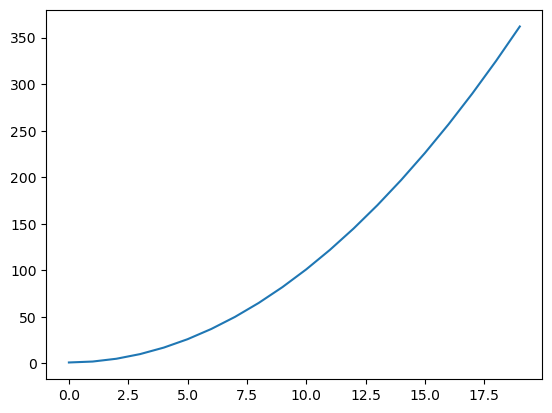

In [3]:
# graphing data
plt.plot(x_train, y_train)
plt.show()

### using previous notebook function to find w and b

In [4]:
iteration = 1000
alpha = 1e-2
w, b, j_hist = run_gradient_descent(x_train, y_train, iteration, alpha)
print(w, b)

[18.69806954] [-52.08341025]


In [5]:
# model
def model(w,x,b):
    m = x.shape[0]
    predicted_y = np.zeros(m)
    for i in range(m):
        y = np.dot(w,x[i]) + b
        predicted_y[i] = y
    return predicted_y

In [6]:
predicted_y = model(w, x_train, b)

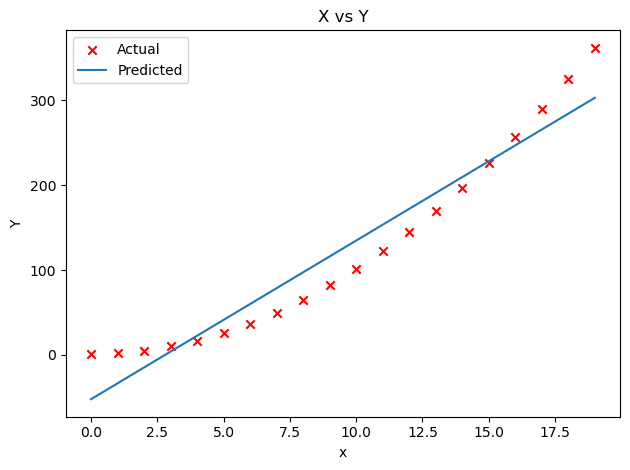

In [7]:
# plt.style.use("seaborn")

plt.scatter(x_train, y_train, marker="x", color='r' ,label= "Actual")
plt.plot(x_train, predicted_y, label = "Predicted")
plt.xlabel("x")
plt.ylabel("Y")
plt.title("X vs Y")
plt.tight_layout()
plt.legend()
plt.show()

### feature engineering 

In [8]:
# creating new data
x = np.arange(0,20,1)
x = x.reshape(-1, 1)

y = x ** 2 + 1

# feature engineering 
X = x ** 2 + 1

In [9]:
iteration = 10000
alpha = 1e-5
w, b, j_hist = run_gradient_descent(X, y, iteration, alpha)

In [10]:
y_hat = model(w, X, b)

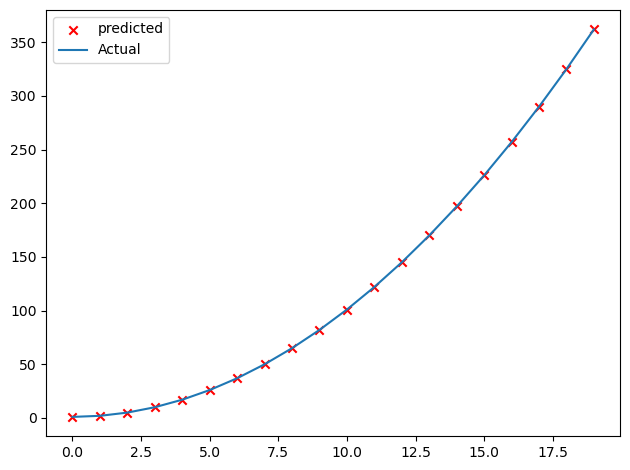

In [11]:
# plotting 
plt.scatter(x, y, marker='x', color='r', label="predicted")
plt.plot(x, y_hat, label='Actual')
plt.tight_layout()
plt.legend()
plt.show()

### Selecting Features 

In [12]:
# let's try different values of X
x = np.arange(0,20,1)

y = x ** 2 + 1

X = np.c_[x, x**2, x**3]

In [13]:
iteration = 10000
alpha = 1e-7
w, b, j_hist = run_gradient_descent(X, y, iteration, alpha)

In [14]:
w, b

(array([0.08447334, 0.54608322, 0.02711841]), 0.011039016941710573)

Gradient descent has emphasized the data that is the best fit to the  𝑥2
  data by increasing the  𝑤1
  term relative to the others

In [15]:
predicted_y = model(w, X, b)

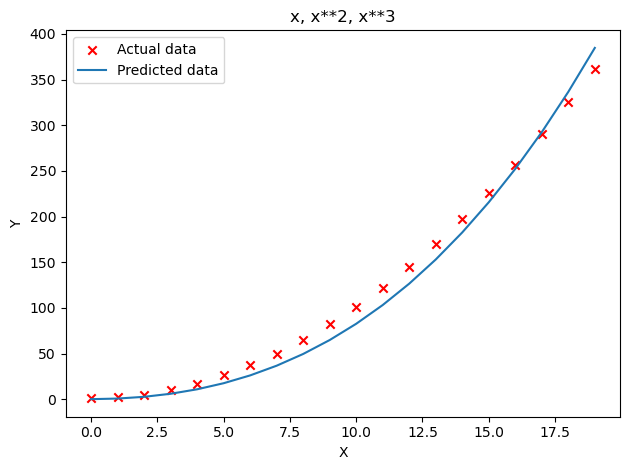

In [16]:
plt.scatter(x, y, marker='x', color='r', label="Actual data")
plt.plot(x, predicted_y, label='Predicted data')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("x, x**2, x**3")
plt.legend()
plt.tight_layout()
plt.show()

### An Alternative View

In [17]:
# creating data
x = np.arange(0,20,1)
y = x ** 2

# feature enginnering 
X = np.c_[x, x**2, x**3]
X_feature = ["x", "x^2", "x^3"]

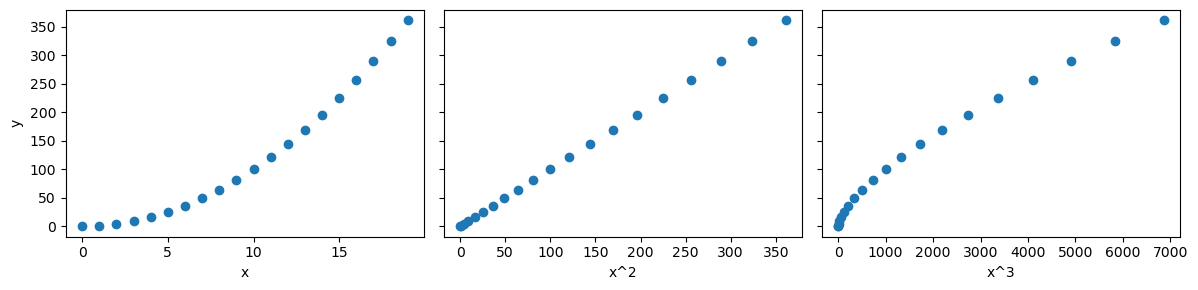

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3), sharey=True)
for i in range(len(X_feature)):
    ax[i].scatter(X[:, i], y)
    ax[i].set_xlabel(X_feature[i])

ax[0].set_ylabel("y")
plt.tight_layout()
plt.show()

Above, it is clear that the 𝑥2 feature mapped against the target value 𝑦 is linear. Linear regression can then easily generate a model using that feature.

### Scaling Features

it is important to apply feature scaling when doing feature engineering

In [19]:
# creating new data
x = np.arange(0, 20, 1)

y = x**2

X = np.c_[x, x**2, x**3]

# using z score normalization to make data relatively comparable
mu, sigma, z_norm = zscore_norm(X)

In [20]:
# peak to peak comparison
# when raw 
ptp_raw = np.ptp(X, axis=0)

# when scaled
ptp_scaled = np.ptp(z_norm, axis=0)


In [21]:
iterations = 100000
alpha = 1e-1
w, b, j_hist = run_gradient_descent(z_norm, y, iterations, alpha)

In [22]:
predicted_y = model(w, z_norm, b)

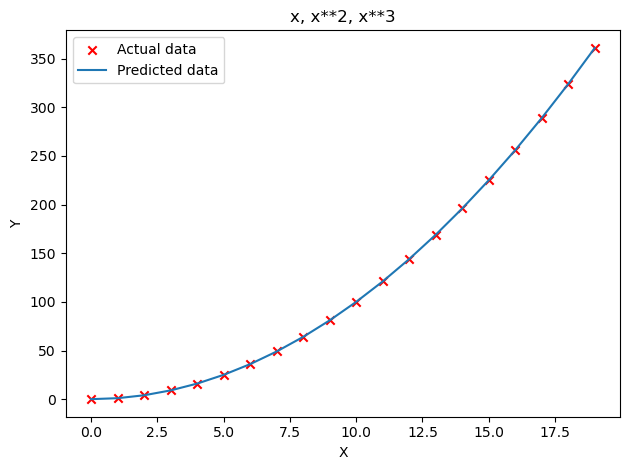

In [23]:
plt.scatter(x, y, marker='x', color='r', label="Actual data")
plt.plot(x, predicted_y, label='Predicted data')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("x, x**2, x**3")
plt.legend()
plt.tight_layout()
plt.show()

Feature scaling allows this to converge much faster.

In [28]:
# creating data
x = np.arange(0, 20, 1)

y = np.cos(x / 2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]

mu, sigma, z_norm = zscore_norm(X)

(20, 13)

In [29]:
iterations=1000000
alpha = 1e-1
w, b, j_hist = run_gradient_descent(z_norm, y, iterations, alpha)

In [45]:
predicted_y = model(w, z_norm, b)

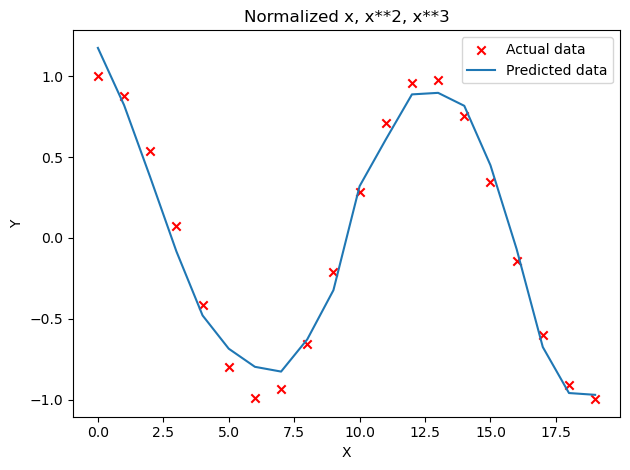

In [48]:
plt.scatter(x, y, marker='x', color='r', label="Actual data")
plt.plot(x, predicted_y, label='Predicted data')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Normalized x, x**2, x**3")
plt.legend()
plt.tight_layout()
plt.show()